<a href="https://colab.research.google.com/github/Sisterno/ML_RedesNeuronales/blob/master/IT06/Modelo_entrenamiento__IT06_try02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# import os
# import PIL
# import tensorflow as tf
 
# from tensorflow import keras
# from tensorflow.keras import layers
# from tensorflow.keras.models import Sequential
# from time import time
# import pathlib
 
# path_img_leucocitos = "/content/drive/MyDrive/ML/04-dataset-preprocesado-fusion";
# pathlib_img_leucocitos=pathlib.Path(path_img_leucocitos)
 
# from google.colab import drive
# drive.mount('/content/drive')

# # batch_size = 32
# batch_size = 32
# img_height = 180
# img_width = 180
 
# #-------------------------------------------------------------------------------
# class TimingCallback(keras.callbacks.Callback):
#     def on_train_begin(self, logs={}):
#         self.times = []
#     def on_epoch_begin(self, batch, logs={}):
#         self.epoch_time_start = time()
#     def on_epoch_end(self, batch, logs={}):
#         self.times.append(time() - self.epoch_time_start)
# #-------------------------------------------------------------------------------
# path_img_leucocitos = "/content/drive/MyDrive/ML_test/DT002/train";
# train_ds = tf.data.experimental.load(path_img_leucocitos)

# path_img_leucocitos = "/content/drive/MyDrive/ML_test/DT002/val";
# val_ds = tf.data.experimental.load(path_img_leucocitos)

# # AUTOTUNE = tf.data.AUTOTUNE
# # train_ds=train_ds.prefetch(buffer_size=AUTOTUNE)
# # val_ds=val_ds.prefetch(buffer_size=AUTOTUNE)
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from time import time
import pathlib
 
path_img_leucocitos = "/content/drive/MyDrive/ML/04-dataset-preprocesado-fusion";
pathlib_img_leucocitos=pathlib.Path(path_img_leucocitos)
 
from google.colab import drive
drive.mount('/content/drive')
 
# batch_size = 32
batch_size = 32
img_height = 180
img_width = 180
 
#-------------------------------------------------------------------------------
class TimingCallback(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []
    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time()
    def on_epoch_end(self, batch, logs={}):
        self.times.append(time() - self.epoch_time_start)
#-------------------------------------------------------------------------------
 
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  path_img_leucocitos,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  path_img_leucocitos,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)
 
AUTOTUNE = tf.data.AUTOTUNE
 
# train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
# train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 59877 files belonging to 5 classes.
Using 47902 files for training.
Found 59877 files belonging to 5 classes.
Using 11975 files for validation.


## Modelo DS002-I06-D001

In [ ]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I06_D001 = TimingCallback()
num_classes = 5

model_I06_D001 = Sequential([
  layers.Conv2D (16, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.01)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.01)),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.01)),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.25),
  layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
  layers.Dense(num_classes)

])
model_I06_D001.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I06_D001.summary()

epochs=30
history_I06_D001 = model_I06_D001.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I06_D001]
)

#-------------------------------------------------------------------------------

Epoch 1/30
1497/1497 [==============================] - 176s 116ms/step - loss: 5.6053 - accuracy: 0.6196 - val_loss: 1.8382 - val_accuracy: 0.7384
Epoch 2/30
1497/1497 [==============================] - 174s 116ms/step - loss: 1.3930 - accuracy: 0.7893 - val_loss: 1.0906 - val_accuracy: 0.8477
Epoch 3/30
1497/1497 [==============================] - 175s 116ms/step - loss: 0.9778 - accuracy: 0.8314 - val_loss: 0.8581 - val_accuracy: 0.8668
Epoch 4/30
1497/1497 [==============================] - 176s 117ms/step - loss: 0.8172 - accuracy: 0.8493 - val_loss: 0.7379 - val_accuracy: 0.8637
Epoch 5/30
1497/1497 [==============================] - 177s 118ms/step - loss: 0.7374 - accuracy: 0.8586 - val_loss: 0.6430 - val_accuracy: 0.8875
Epoch 6/30
1497/1497 [==============================] - 177s 118ms/step - loss: 0.6838 - accuracy: 0.8637 - val_loss: 0.5881 - val_accuracy: 0.8934
Epoch 7/30
1497/1497 [==============================] - 176s 117ms/step - loss: 0.6362 - accuracy: 0.8714 - val_

[175.8813157081604, 174.32465147972107, 174.9271261692047, 176.17936515808105, 177.39777731895447, 176.91611909866333, 175.7238733768463, 174.97849559783936, 176.0454239845276, 176.53605818748474, 177.07089281082153, 174.70173478126526, 173.54920482635498, 173.13706517219543, 170.0462784767151, 169.92582774162292, 169.76426720619202, 169.09687066078186, 170.00468945503235, 168.20026874542236, 169.37141275405884, 169.10878229141235, 169.2146909236908, 170.48316764831543, 169.81343483924866, 168.6047329902649, 170.6698386669159, 171.55798745155334, 170.67170977592468, 172.30506134033203]
El entrenamiento se demoro: 5176.208124637604 segundos
El entrenamiento se demoro: 86.27013541062674 minutos
accuracy => 0.910588264465332
loss => 0.473105788230896
val_accuracy => 0.9302713871002197
val_loss => 0.42857128381729126


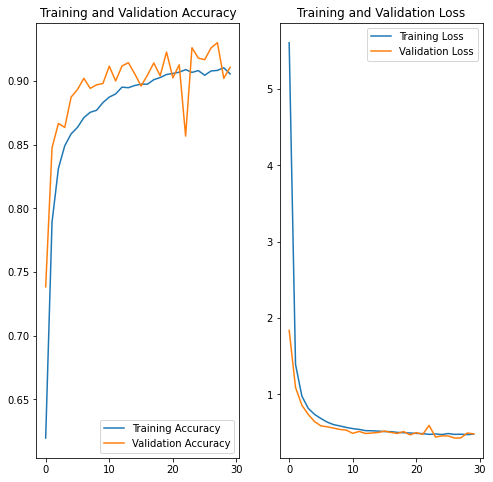

In [ ]:
#-------------------------------------------------------------------------------

print(cb_I06_D001.times)
final_time = 0
for time in cb_I06_D001.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I06_D001.history['accuracy'])))
print('loss => '+ str(min(history_I06_D001.history['loss'])))
print('val_accuracy => '+ str(max(history_I06_D001.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I06_D001.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I06_D001.history['accuracy']
val_acc = history_I06_D001.history['val_accuracy']

loss=history_I06_D001.history['loss']
val_loss=history_I06_D001.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I06-D002

In [ ]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I06_D002 = TimingCallback()
num_classes = 5

model_I06_D002 = Sequential([
  layers.Conv2D (16, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.001)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.001)),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.001)),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.25),
  layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
  layers.Dense(num_classes)

])
model_I06_D002.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I06_D002.summary()

epochs=30
history_I06_D002 = model_I06_D002.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I06_D002]
)

#-------------------------------------------------------------------------------

Epoch 1/30
1497/1497 [==============================] - 172s 114ms/step - loss: 5.1494 - accuracy: 0.7133 - val_loss: 0.7815 - val_accuracy: 0.8327
Epoch 2/30
1497/1497 [==============================] - 171s 114ms/step - loss: 0.6764 - accuracy: 0.8680 - val_loss: 0.5956 - val_accuracy: 0.8940
Epoch 3/30
1497/1497 [==============================] - 168s 112ms/step - loss: 0.5671 - accuracy: 0.8976 - val_loss: 0.5477 - val_accuracy: 0.9034
Epoch 4/30
1497/1497 [==============================] - 169s 113ms/step - loss: 0.5167 - accuracy: 0.9073 - val_loss: 0.4869 - val_accuracy: 0.9191
Epoch 5/30
1497/1497 [==============================] - 169s 113ms/step - loss: 0.4946 - accuracy: 0.9146 - val_loss: 0.5573 - val_accuracy: 0.8889
Epoch 6/30
1497/1497 [==============================] - 169s 113ms/step - loss: 0.4955 - accuracy: 0.9165 - val_loss: 0.5154 - val_accuracy: 0.9231
Epoch 7/30
1497/1497 [==============================] - 170s 113ms/step - loss: 0.4979 - accuracy: 0.9179 - val_

[172.4636688232422, 170.55469751358032, 168.43197441101074, 169.14388346672058, 169.28584718704224, 169.19300723075867, 169.7010850906372, 168.41717910766602, 168.39084315299988, 169.69038033485413, 171.260338306427, 172.80689311027527, 173.26227355003357, 172.87245869636536, 172.90219449996948, 169.6625623703003, 171.61370086669922, 175.09382343292236, 171.6196641921997, 173.06653022766113, 167.60095500946045, 169.47538089752197, 172.25440573692322, 174.95254397392273, 174.01175165176392, 170.7717878818512, 174.20507860183716, 173.5187017917633, 173.44136571884155, 173.146874666214]
El entrenamiento se demoro: 5142.811851501465 segundos
El entrenamiento se demoro: 85.71353085835774 minutos
accuracy => 0.9494384527206421
loss => 0.32700467109680176
val_accuracy => 0.952150285243988
val_loss => 0.3168480098247528


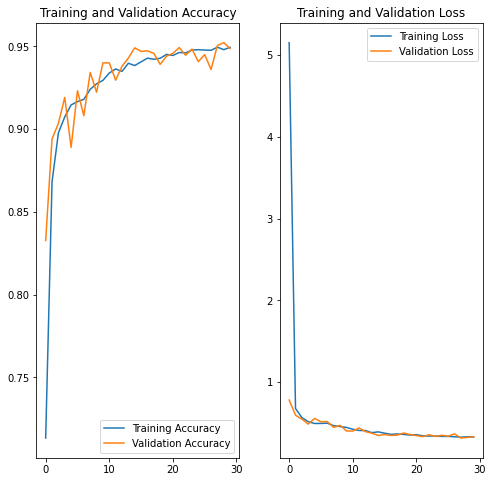

In [ ]:
#-------------------------------------------------------------------------------

print(cb_I06_D002.times)
final_time = 0
for time in cb_I06_D002.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I06_D002.history['accuracy'])))
print('loss => '+ str(min(history_I06_D002.history['loss'])))
print('val_accuracy => '+ str(max(history_I06_D002.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I06_D002.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I06_D002.history['accuracy']
val_acc = history_I06_D002.history['val_accuracy']

loss=history_I06_D002.history['loss']
val_loss=history_I06_D002.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I06-D003

In [ ]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I06_D003 = TimingCallback()
num_classes = 5

model_I06_D003 = Sequential([
  layers.Conv2D (16, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.0001)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.0001)),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.0001)),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.25),
  layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.0001)),
  layers.Dense(num_classes)

])
model_I06_D003.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I06_D003.summary()

epochs=30
history_I06_D003 = model_I06_D003.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I06_D003]
)

#-------------------------------------------------------------------------------

Epoch 1/30
1497/1497 [==============================] - 175s 116ms/step - loss: 3.4118 - accuracy: 0.7032 - val_loss: 0.5962 - val_accuracy: 0.7989
Epoch 2/30
1497/1497 [==============================] - 172s 115ms/step - loss: 0.4596 - accuracy: 0.8497 - val_loss: 0.4180 - val_accuracy: 0.8752
Epoch 3/30
1497/1497 [==============================] - 177s 118ms/step - loss: 0.3783 - accuracy: 0.8832 - val_loss: 0.3188 - val_accuracy: 0.9116
Epoch 4/30
1497/1497 [==============================] - 178s 118ms/step - loss: 0.3302 - accuracy: 0.9050 - val_loss: 0.3529 - val_accuracy: 0.9068
Epoch 5/30
1497/1497 [==============================] - 176s 117ms/step - loss: 0.3109 - accuracy: 0.9181 - val_loss: 0.3339 - val_accuracy: 0.9133
Epoch 6/30
1497/1497 [==============================] - 174s 116ms/step - loss: 0.3019 - accuracy: 0.9282 - val_loss: 0.2993 - val_accuracy: 0.9360
Epoch 7/30
1497/1497 [==============================] - 176s 117ms/step - loss: 0.2994 - accuracy: 0.9366 - val_

[175.24866485595703, 172.24885606765747, 176.9327790737152, 177.62573051452637, 176.33999586105347, 174.14216423034668, 175.7636890411377, 176.40408205986023, 174.9258291721344, 175.34033155441284, 176.18085861206055, 176.4273476600647, 176.7451469898224, 179.42010521888733, 174.97189092636108, 174.81972217559814, 177.03534698486328, 178.57230019569397, 181.9313952922821, 180.0622055530548, 178.78370547294617, 176.30615329742432, 177.17511200904846, 175.4203884601593, 174.94476103782654, 176.27636671066284, 176.14223909378052, 174.9444351196289, 174.48897695541382, 175.3803734779358]
El entrenamiento se demoro: 5291.000953674316 segundos
El entrenamiento se demoro: 88.18334922790527 minutos
accuracy => 0.9731743931770325
loss => 0.25271138548851013
val_accuracy => 0.9599164724349976
val_loss => 0.29933881759643555


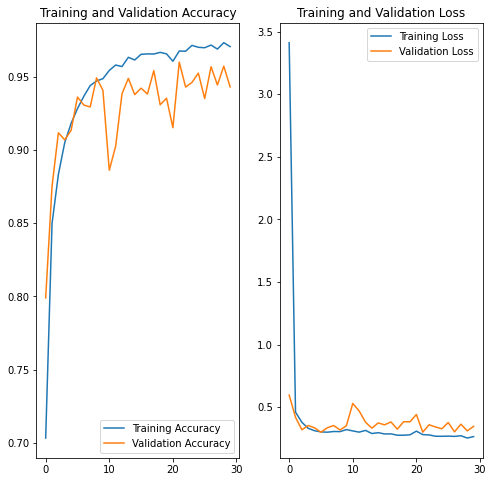

In [ ]:
#-------------------------------------------------------------------------------

print(cb_I06_D003.times)
final_time = 0
for time in cb_I06_D003.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I06_D003.history['accuracy'])))
print('loss => '+ str(min(history_I06_D003.history['loss'])))
print('val_accuracy => '+ str(max(history_I06_D003.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I06_D003.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I06_D003.history['accuracy']
val_acc = history_I06_D003.history['val_accuracy']

loss=history_I06_D003.history['loss']
val_loss=history_I06_D003.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I06-D004

In [ ]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I06_D004 = TimingCallback()
num_classes = 5

model_I06_D004 = Sequential([
  layers.Conv2D (16, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.0005)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.0005)),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.0005)),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.25),
  layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.0005)),
  layers.Dense(num_classes)

])
model_I06_D004.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I06_D004.summary()

epochs=30
history_I06_D004 = model_I06_D004.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I06_D004]
)

#-------------------------------------------------------------------------------

Epoch 1/30
1497/1497 [==============================] - 177s 117ms/step - loss: 5.8438 - accuracy: 0.5690 - val_loss: 0.7737 - val_accuracy: 0.7641
Epoch 2/30
1497/1497 [==============================] - 178s 119ms/step - loss: 0.6730 - accuracy: 0.8127 - val_loss: 0.5440 - val_accuracy: 0.8577
Epoch 3/30
1497/1497 [==============================] - 175s 117ms/step - loss: 0.5444 - accuracy: 0.8594 - val_loss: 0.5017 - val_accuracy: 0.8795
Epoch 4/30
1497/1497 [==============================] - 176s 117ms/step - loss: 0.4915 - accuracy: 0.8838 - val_loss: 0.4405 - val_accuracy: 0.9042
Epoch 5/30
1497/1497 [==============================] - 177s 118ms/step - loss: 0.4595 - accuracy: 0.8980 - val_loss: 0.4449 - val_accuracy: 0.9136
Epoch 6/30
1497/1497 [==============================] - 179s 119ms/step - loss: 0.4460 - accuracy: 0.9060 - val_loss: 0.4994 - val_accuracy: 0.8966
Epoch 7/30
1497/1497 [==============================] - 177s 118ms/step - loss: 0.4436 - accuracy: 0.9143 - val_

[177.05519008636475, 178.49355673789978, 175.05109882354736, 176.4394850730896, 176.98079705238342, 178.80164122581482, 177.12552428245544, 169.77079319953918, 177.00542759895325, 175.82590103149414, 172.71430015563965, 174.3889501094818, 173.86089062690735, 174.39693427085876, 171.05684781074524, 171.47970032691956, 173.33993315696716, 176.74229502677917, 176.78359603881836, 176.19240379333496, 174.59439897537231, 174.9138617515564, 174.92839741706848, 175.4108099937439, 178.4308533668518, 178.40834856033325, 177.60261988639832, 177.61631798744202, 178.02985429763794, 177.45079970359802]
El entrenamiento se demoro: 5270.891528367996 segundos
El entrenamiento se demoro: 87.8481921394666 minutos
accuracy => 0.9561604857444763
loss => 0.3146304190158844
val_accuracy => 0.9582463502883911
val_loss => 0.3153117597103119


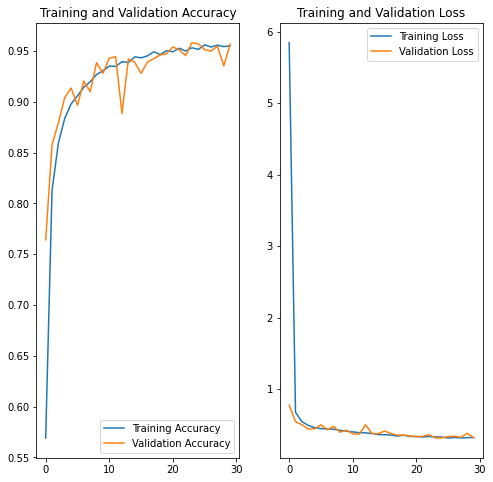

In [ ]:
#-------------------------------------------------------------------------------

print(cb_I06_D004.times)
final_time = 0
for time in cb_I06_D004.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I06_D004.history['accuracy'])))
print('loss => '+ str(min(history_I06_D004.history['loss'])))
print('val_accuracy => '+ str(max(history_I06_D004.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I06_D004.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I06_D004.history['accuracy']
val_acc = history_I06_D004.history['val_accuracy']

loss=history_I06_D004.history['loss']
val_loss=history_I06_D004.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I06-D005

In [ ]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I06_D005 = TimingCallback()
num_classes = 5

model_I06_D005 = Sequential([
  layers.Conv2D (16, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.00005)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.00005)),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.00005)),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.25),
  layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.00005)),
  layers.Dense(num_classes)

])
model_I06_D005.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I06_D005.summary()

epochs=30
history_I06_D005 = model_I06_D005.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I06_D005]
)

#-------------------------------------------------------------------------------

Epoch 1/30
1497/1497 [==============================] - 178s 118ms/step - loss: 10.4560 - accuracy: 0.5291 - val_loss: 0.6874 - val_accuracy: 0.7381
Epoch 2/30
1497/1497 [==============================] - 175s 116ms/step - loss: 0.5881 - accuracy: 0.7861 - val_loss: 0.4576 - val_accuracy: 0.8425
Epoch 3/30
1497/1497 [==============================] - 179s 119ms/step - loss: 0.4222 - accuracy: 0.8541 - val_loss: 0.3786 - val_accuracy: 0.8722
Epoch 4/30
1497/1497 [==============================] - 180s 120ms/step - loss: 0.3714 - accuracy: 0.8780 - val_loss: 0.3300 - val_accuracy: 0.9005
Epoch 5/30
1497/1497 [==============================] - 181s 121ms/step - loss: 0.3400 - accuracy: 0.8967 - val_loss: 0.3242 - val_accuracy: 0.9039
Epoch 6/30
1497/1497 [==============================] - 180s 120ms/step - loss: 0.3068 - accuracy: 0.9163 - val_loss: 0.3168 - val_accuracy: 0.9144
Epoch 7/30
1497/1497 [==============================] - 181s 121ms/step - loss: 0.3012 - accuracy: 0.9243 - val

[177.94975805282593, 174.553537607193, 179.20341610908508, 180.48597598075867, 181.0659363269806, 179.92589044570923, 181.37419629096985, 180.93479871749878, 181.63471221923828, 180.45838832855225, 180.8774631023407, 182.44030284881592, 181.63142275810242, 181.61192965507507, 184.22807931900024, 185.10524559020996, 188.25216364860535, 187.25363659858704, 187.86704874038696, 185.41429448127747, 187.09092712402344, 186.77544116973877, 182.3430814743042, 182.47450399398804, 181.61828303337097, 180.64993929862976, 175.93859767913818, 178.17863535881042, 177.7276599407196, 177.15739965438843]
El entrenamiento se demoro: 5452.222665548325 segundos
El entrenamiento se demoro: 90.87037775913875 minutos
accuracy => 0.9707527756690979
loss => 0.23338299989700317
val_accuracy => 0.9540709853172302
val_loss => 0.2937462031841278


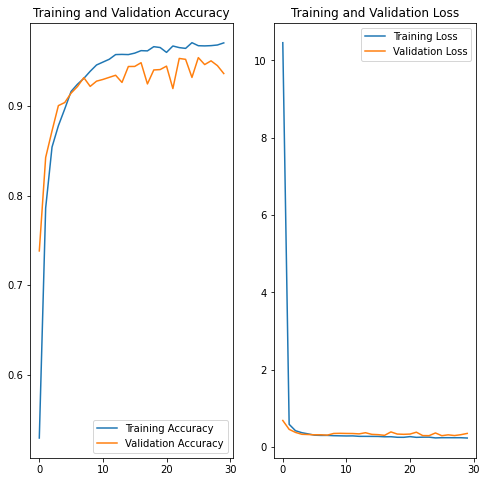

In [ ]:
#-------------------------------------------------------------------------------

print(cb_I06_D005.times)
final_time = 0
for time in cb_I06_D005.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I06_D005.history['accuracy'])))
print('loss => '+ str(min(history_I06_D005.history['loss'])))
print('val_accuracy => '+ str(max(history_I06_D005.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I06_D005.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I06_D005.history['accuracy']
val_acc = history_I06_D005.history['val_accuracy']

loss=history_I06_D005.history['loss']
val_loss=history_I06_D005.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I06-D006
El mismo caso anterior , pero reduciendo el numero de ciclos para encontrar un punto obtimo.

In [ ]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I06_D006 = TimingCallback()
num_classes = 5

model_I06_D006 = Sequential([
  layers.Conv2D (16, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.00005)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.00005)),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.00005)),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.25),
  layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.00005)),
  layers.Dense(num_classes)

])
model_I06_D006.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I06_D006.summary()

epochs=12
history_I06_D006 = model_I06_D006.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I06_D006]
)

#-------------------------------------------------------------------------------

Epoch 1/12
1497/1497 [==============================] - 180s 119ms/step - loss: 3.9968 - accuracy: 0.6301 - val_loss: 0.5777 - val_accuracy: 0.7954
Epoch 2/12
1497/1497 [==============================] - 177s 118ms/step - loss: 0.4901 - accuracy: 0.8200 - val_loss: 0.4676 - val_accuracy: 0.8380
Epoch 3/12
1497/1497 [==============================] - 181s 120ms/step - loss: 0.3905 - accuracy: 0.8625 - val_loss: 0.3778 - val_accuracy: 0.8691
Epoch 4/12
1497/1497 [==============================] - 180s 120ms/step - loss: 0.3486 - accuracy: 0.8845 - val_loss: 0.2903 - val_accuracy: 0.9084
Epoch 5/12
1497/1497 [==============================] - 181s 120ms/step - loss: 0.3064 - accuracy: 0.9024 - val_loss: 0.2966 - val_accuracy: 0.9103
Epoch 6/12
1497/1497 [==============================] - 182s 121ms/step - loss: 0.2846 - accuracy: 0.9162 - val_loss: 0.2919 - val_accuracy: 0.9169
Epoch 7/12
1497/1497 [==============================] - 175s 117ms/step - loss: 0.2672 - accuracy: 0.9269 - val_

[179.67079520225525, 177.48606491088867, 180.61203289031982, 180.13768243789673, 180.56598138809204, 181.54401016235352, 175.35525178909302, 175.87590098381042, 176.1905002593994, 176.77926993370056, 174.64302396774292, 173.96434497833252]
El entrenamiento se demoro: 2132.824858903885 segundos
El entrenamiento se demoro: 35.54708098173141 minutos
accuracy => 0.9577888250350952
loss => 0.23402772843837738
val_accuracy => 0.9462212920188904
val_loss => 0.2656410038471222


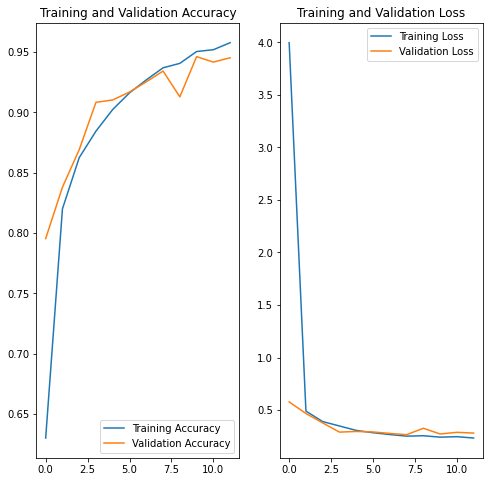

In [ ]:
#-------------------------------------------------------------------------------

print(cb_I06_D006.times)
final_time = 0
for time in cb_I06_D006.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I06_D006.history['accuracy'])))
print('loss => '+ str(min(history_I06_D006.history['loss'])))
print('val_accuracy => '+ str(max(history_I06_D006.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I06_D006.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I06_D006.history['accuracy']
val_acc = history_I06_D006.history['val_accuracy']

loss=history_I06_D006.history['loss']
val_loss=history_I06_D006.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
history_I06_D006 = model_I06_D006.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3,
)

Epoch 1/3
1497/1497 [==============================] - 171s 114ms/step - loss: 0.2324 - accuracy: 0.9618 - val_loss: 0.3829 - val_accuracy: 0.9176
Epoch 2/3
1497/1497 [==============================] - 172s 115ms/step - loss: 0.2269 - accuracy: 0.9640 - val_loss: 0.2735 - val_accuracy: 0.9506
Epoch 3/3
1497/1497 [==============================] - 179s 119ms/step - loss: 0.2292 - accuracy: 0.9642 - val_loss: 0.2769 - val_accuracy: 0.9514


## Modelo DS002-I06-D007
Probemos reduciendo mas el nivel de regularizacion.

In [ ]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I06_D007 = TimingCallback()
num_classes = 5
regularizer = 0.000025

model_I06_D007 = Sequential([
  layers.Conv2D (16, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(regularizer)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(regularizer)),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(regularizer)),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.25),
  layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(regularizer)),
  layers.Dense(num_classes)

])
model_I06_D007.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I06_D007.summary()

epochs=20
history_I06_D007 = model_I06_D007.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I06_D007]
)

#-------------------------------------------------------------------------------

Epoch 1/20
1497/1497 [==============================] - 175s 116ms/step - loss: 4.0010 - accuracy: 0.5804 - val_loss: 0.5748 - val_accuracy: 0.7774
Epoch 2/20
1497/1497 [==============================] - 173s 115ms/step - loss: 0.4874 - accuracy: 0.8195 - val_loss: 0.3647 - val_accuracy: 0.8716
Epoch 3/20
1497/1497 [==============================] - 170s 113ms/step - loss: 0.3583 - accuracy: 0.8761 - val_loss: 0.3146 - val_accuracy: 0.8971
Epoch 4/20
1497/1497 [==============================] - 172s 115ms/step - loss: 0.3071 - accuracy: 0.8983 - val_loss: 0.3180 - val_accuracy: 0.9024
Epoch 5/20
1497/1497 [==============================] - 171s 114ms/step - loss: 0.2792 - accuracy: 0.9131 - val_loss: 0.2832 - val_accuracy: 0.9127
Epoch 6/20
1497/1497 [==============================] - 170s 113ms/step - loss: 0.2633 - accuracy: 0.9241 - val_loss: 0.2683 - val_accuracy: 0.9254
Epoch 7/20
1497/1497 [==============================] - 169s 113ms/step - loss: 0.2580 - accuracy: 0.9319 - val_

[175.18442702293396, 172.86092925071716, 169.79035758972168, 172.04943323135376, 170.94951128959656, 169.69713759422302, 169.16360211372375, 168.9914906024933, 172.3948574066162, 174.194833278656, 174.00808811187744, 171.7620975971222, 169.82592105865479, 174.1207718849182, 175.83416199684143, 176.00729370117188, 172.59461331367493, 174.65753936767578, 177.9937436580658, 176.13201785087585]
El entrenamiento se demoro: 3458.2128279209137 segundos
El entrenamiento se demoro: 57.63688046534856 minutos
accuracy => 0.973842442035675
loss => 0.18939785659313202
val_accuracy => 0.9517327547073364
val_loss => 0.25575143098831177


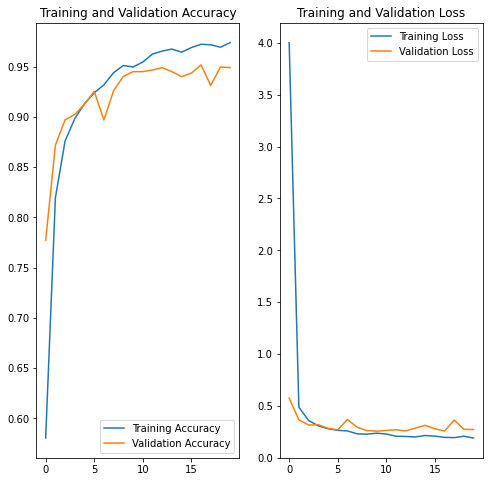

In [ ]:
#-------------------------------------------------------------------------------

print(cb_I06_D007.times)
final_time = 0
for time in cb_I06_D007.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I06_D007.history['accuracy'])))
print('loss => '+ str(min(history_I06_D007.history['loss'])))
print('val_accuracy => '+ str(max(history_I06_D007.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I06_D007.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I06_D007.history['accuracy']
val_acc = history_I06_D007.history['val_accuracy']

loss=history_I06_D007.history['loss']
val_loss=history_I06_D007.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I06-D008
Probemos reduciendo mas el nivel de regularizacion. 0.00004

In [ ]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I06_D008 = TimingCallback()
num_classes = 5
regularizer = 0.00004

model_I06_D008 = Sequential([
  layers.Conv2D (16, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(regularizer)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(regularizer)),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(regularizer)),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.25),
  layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(regularizer)),
  layers.Dense(num_classes)

])
model_I06_D008.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I06_D008.summary()

epochs=20
history_I06_D008 = model_I06_D008.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I06_D008]
)

#-------------------------------------------------------------------------------

Epoch 1/20
1497/1497 [==============================] - 176s 117ms/step - loss: 3.9733 - accuracy: 0.6081 - val_loss: 0.7373 - val_accuracy: 0.7315
Epoch 2/20
1497/1497 [==============================] - 177s 118ms/step - loss: 0.5531 - accuracy: 0.7928 - val_loss: 0.5226 - val_accuracy: 0.8124
Epoch 3/20
1497/1497 [==============================] - 171s 114ms/step - loss: 0.3870 - accuracy: 0.8618 - val_loss: 0.3298 - val_accuracy: 0.8848
Epoch 4/20
1497/1497 [==============================] - 171s 114ms/step - loss: 0.3206 - accuracy: 0.8892 - val_loss: 0.3140 - val_accuracy: 0.8929
Epoch 5/20
1497/1497 [==============================] - 173s 115ms/step - loss: 0.2880 - accuracy: 0.9053 - val_loss: 0.2709 - val_accuracy: 0.9203
Epoch 6/20
1497/1497 [==============================] - 174s 116ms/step - loss: 0.2683 - accuracy: 0.9172 - val_loss: 0.2537 - val_accuracy: 0.9280
Epoch 7/20
1497/1497 [==============================] - 170s 113ms/step - loss: 0.2480 - accuracy: 0.9293 - val_

[175.94904136657715, 176.68684792518616, 171.19961094856262, 171.05227708816528, 172.75842118263245, 174.14243960380554, 170.28811764717102, 171.7700915336609, 171.72268199920654, 170.7144718170166, 169.70206332206726, 168.88747334480286, 166.98696756362915, 168.95074939727783, 169.89960074424744, 171.10113525390625, 170.72264671325684, 170.88726019859314, 171.44267868995667, 171.75247812271118]
El entrenamiento se demoro: 3426.617054462433 segundos
El entrenamiento se demoro: 57.110284241040546 minutos
accuracy => 0.9716086983680725
loss => 0.20930445194244385
val_accuracy => 0.9575783014297485
val_loss => 0.2537418603897095


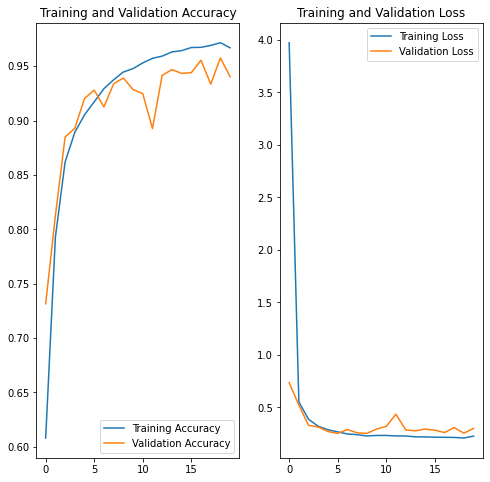

In [ ]:
#-------------------------------------------------------------------------------

print(cb_I06_D008.times)
final_time = 0
for time in cb_I06_D008.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I06_D008.history['accuracy'])))
print('loss => '+ str(min(history_I06_D008.history['loss'])))
print('val_accuracy => '+ str(max(history_I06_D008.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I06_D008.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I06_D008.history['accuracy']
val_acc = history_I06_D008.history['val_accuracy']

loss=history_I06_D008.history['loss']
val_loss=history_I06_D008.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I06-D008 try 02
Probemos reduciendo mas el nivel de regularizacion. 0.00004

In [25]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I06_D008 = TimingCallback()
num_classes = 5
regularizer = 0.00004

model_I06_D008 = Sequential([
  layers.Conv2D (16, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(regularizer)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(regularizer)),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(regularizer)),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.25),
  layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(regularizer)),
  layers.Dense(num_classes)

])
model_I06_D008.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I06_D008.summary()

epochs=20
history_I06_D008 = model_I06_D008.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I06_D008]
)

#-------------------------------------------------------------------------------

Epoch 1/20
1497/1497 [==============================] - 190s 126ms/step - loss: 7.4874 - accuracy: 0.5772 - val_loss: 0.7207 - val_accuracy: 0.7334
Epoch 2/20
1497/1497 [==============================] - 180s 120ms/step - loss: 0.5259 - accuracy: 0.8065 - val_loss: 0.4625 - val_accuracy: 0.8377
Epoch 3/20
1497/1497 [==============================] - 181s 120ms/step - loss: 0.4187 - accuracy: 0.8461 - val_loss: 0.4093 - val_accuracy: 0.8457
Epoch 4/20
1497/1497 [==============================] - 180s 120ms/step - loss: 0.3786 - accuracy: 0.8659 - val_loss: 0.3879 - val_accuracy: 0.8630
Epoch 5/20
1497/1497 [==============================] - 180s 120ms/step - loss: 0.3470 - accuracy: 0.8812 - val_loss: 0.2917 - val_accuracy: 0.9017
Epoch 6/20
1497/1497 [==============================] - 180s 120ms/step - loss: 0.3079 - accuracy: 0.9004 - val_loss: 0.2689 - val_accuracy: 0.9152
Epoch 7/20
1497/1497 [==============================] - 182s 121ms/step - loss: 0.2890 - accuracy: 0.9129 - val_

[189.52812242507935, 180.38874411582947, 180.52490067481995, 180.16111755371094, 180.3202679157257, 179.79667830467224, 182.11316108703613, 181.59005880355835, 182.90812706947327, 181.6791639328003, 182.95926308631897, 180.23971033096313, 180.94365978240967, 179.50487780570984, 180.0017762184143, 179.93843984603882, 181.14220786094666, 186.89210963249207, 185.26581740379333, 187.31616640090942]
El entrenamiento se demoro: 3643.214370250702 segundos
El entrenamiento se demoro: 60.720239504178366 minutos
accuracy => 0.9661391973495483
loss => 0.2182096689939499
val_accuracy => 0.9524008631706238
val_loss => 0.2517130970954895


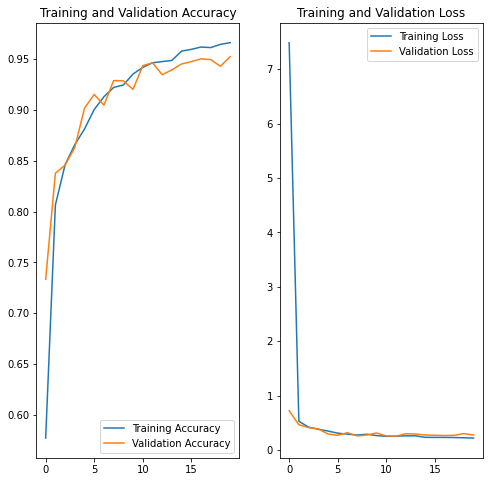

In [26]:
#-------------------------------------------------------------------------------

print(cb_I06_D008.times)
final_time = 0
for time in cb_I06_D008.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I06_D008.history['accuracy'])))
print('loss => '+ str(min(history_I06_D008.history['loss'])))
print('val_accuracy => '+ str(max(history_I06_D008.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I06_D008.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I06_D008.history['accuracy']
val_acc = history_I06_D008.history['val_accuracy']

loss=history_I06_D008.history['loss']
val_loss=history_I06_D008.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I06-D009
Probemos reduciendo mas el nivel de regularizacion. 0.000035

In [ ]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I06_D009 = TimingCallback()
num_classes = 5
regularizer = 0.000035

model_I06_D009 = Sequential([
  layers.Conv2D (16, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(regularizer)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(regularizer)),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(regularizer)),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.25),
  layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(regularizer)),
  layers.Dense(num_classes)

])
model_I06_D009.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I06_D009.summary()

epochs=20
history_I06_D009 = model_I06_D009.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I06_D009]
)

#-------------------------------------------------------------------------------

Epoch 1/20
1497/1497 [==============================] - 178s 118ms/step - loss: 5.8025 - accuracy: 0.6546 - val_loss: 0.4951 - val_accuracy: 0.8294
Epoch 2/20
1497/1497 [==============================] - 174s 116ms/step - loss: 0.4356 - accuracy: 0.8441 - val_loss: 0.4581 - val_accuracy: 0.8465
Epoch 3/20
1497/1497 [==============================] - 176s 117ms/step - loss: 0.3383 - accuracy: 0.8870 - val_loss: 0.3347 - val_accuracy: 0.8870
Epoch 4/20
1497/1497 [==============================] - 176s 117ms/step - loss: 0.3082 - accuracy: 0.9031 - val_loss: 0.2855 - val_accuracy: 0.9137
Epoch 5/20
1497/1497 [==============================] - 178s 119ms/step - loss: 0.2814 - accuracy: 0.9214 - val_loss: 0.3027 - val_accuracy: 0.9149
Epoch 6/20
1497/1497 [==============================] - 179s 119ms/step - loss: 0.2920 - accuracy: 0.9230 - val_loss: 0.2723 - val_accuracy: 0.9314
Epoch 7/20
1497/1497 [==============================] - 176s 117ms/step - loss: 0.2644 - accuracy: 0.9386 - val_

[177.5408160686493, 173.68276357650757, 175.5112497806549, 175.97860836982727, 178.33540081977844, 179.0300168991089, 176.37429094314575, 175.08348488807678, 178.0615906715393, 176.04912900924683, 177.5329782962799, 176.60067105293274, 175.59893226623535, 173.7266139984131, 177.2767035961151, 185.68571972846985, 184.62902688980103, 181.52529120445251, 177.0791039466858, 177.57554030418396]
El entrenamiento se demoro: 3552.8779323101044 segundos
El entrenamiento se demoro: 59.21463220516841 minutos
accuracy => 0.9704396724700928
loss => 0.21930621564388275
val_accuracy => 0.9559081196784973
val_loss => 0.27225181460380554


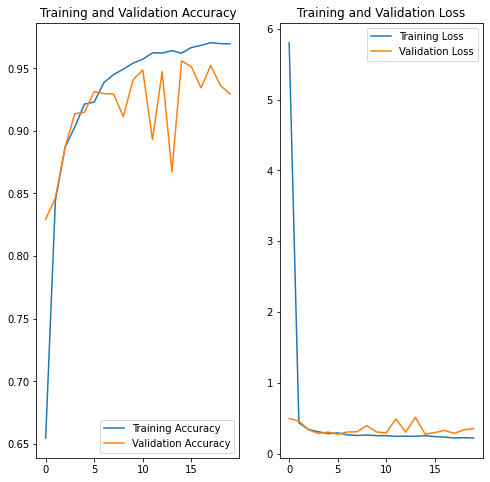

In [ ]:
#-------------------------------------------------------------------------------

print(cb_I06_D009.times)
final_time = 0
for time in cb_I06_D009.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I06_D009.history['accuracy'])))
print('loss => '+ str(min(history_I06_D009.history['loss'])))
print('val_accuracy => '+ str(max(history_I06_D009.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I06_D009.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I06_D009.history['accuracy']
val_acc = history_I06_D009.history['val_accuracy']

loss=history_I06_D009.history['loss']
val_loss=history_I06_D009.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I06-D009 try-2
Probemos reduciendo mas el nivel de regularizacion. 0.000035

In [ ]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I06_D009 = TimingCallback()
num_classes = 5
regularizer = 0.000035

model_I06_D009 = Sequential([
  layers.Conv2D (16, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(regularizer)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(regularizer)),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(regularizer)),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.25),
  layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(regularizer)),
  layers.Dense(num_classes)

])
model_I06_D009.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I06_D009.summary()

epochs=20
history_I06_D009 = model_I06_D009.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I06_D009]
)

#-------------------------------------------------------------------------------

Epoch 1/20
1497/1497 [==============================] - 182s 121ms/step - loss: 6.6085 - accuracy: 0.5496 - val_loss: 0.7354 - val_accuracy: 0.7131
Epoch 2/20
1497/1497 [==============================] - 178s 118ms/step - loss: 0.5441 - accuracy: 0.8053 - val_loss: 0.5871 - val_accuracy: 0.7881
Epoch 3/20
1497/1497 [==============================] - 181s 121ms/step - loss: 0.3881 - accuracy: 0.8676 - val_loss: 0.3653 - val_accuracy: 0.8819
Epoch 4/20
1497/1497 [==============================] - 184s 123ms/step - loss: 0.3235 - accuracy: 0.8958 - val_loss: 0.3550 - val_accuracy: 0.8880
Epoch 5/20
1497/1497 [==============================] - 185s 123ms/step - loss: 0.2974 - accuracy: 0.9110 - val_loss: 0.2870 - val_accuracy: 0.9214
Epoch 6/20
1497/1497 [==============================] - 182s 121ms/step - loss: 0.2963 - accuracy: 0.9178 - val_loss: 0.2906 - val_accuracy: 0.9211
Epoch 7/20
1497/1497 [==============================] - 183s 122ms/step - loss: 0.2712 - accuracy: 0.9314 - val_

[181.959490776062, 177.77848982810974, 181.0717329978943, 184.11172199249268, 185.35752367973328, 182.17136359214783, 183.17137002944946, 182.42500805854797, 183.2405755519867, 182.41795802116394, 181.08010292053223, 179.13783192634583, 179.61801195144653, 180.1895203590393, 174.2334268093109, 175.78973841667175, 176.79151225090027, 175.58749532699585, 177.2718198299408, 177.38763880729675]
El entrenamiento se demoro: 3600.792333126068 segundos
El entrenamiento se demoro: 60.013205552101134 minutos
accuracy => 0.9691662192344666
loss => 0.22789768874645233
val_accuracy => 0.9545720219612122
val_loss => 0.2824346125125885


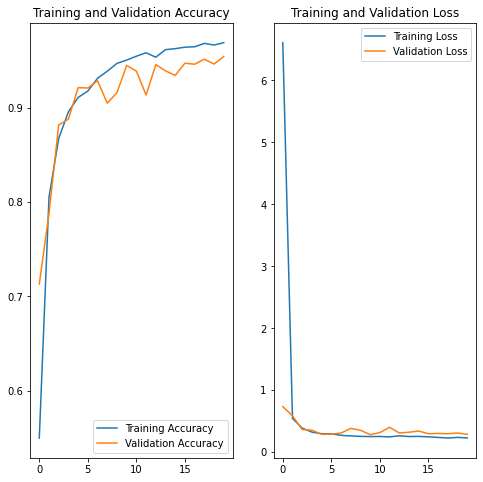

In [27]:
#-------------------------------------------------------------------------------

print(cb_I06_D009.times)
final_time = 0
for time in cb_I06_D009.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I06_D009.history['accuracy'])))
print('loss => '+ str(min(history_I06_D009.history['loss'])))
print('val_accuracy => '+ str(max(history_I06_D009.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I06_D009.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I06_D009.history['accuracy']
val_acc = history_I06_D009.history['val_accuracy']

loss=history_I06_D009.history['loss']
val_loss=history_I06_D009.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()